### This script contains the following:
#### 1. Import libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis 
#### 4. Regression analysis

### 1. Import libraries and data

In [3]:
# Import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
#Import Data

# Define the path to your directory and file name
path = r'C:\Users\north\10-2024 Exploring Chocolate Bar Quality\02 Data\Prepared Data'
file_name = 'cleaned_cacao_data_mapped_clustered_decimal.xlsx'

# Read the Excel file
df_cacao = pd.read_excel(os.path.join(path, file_name))

### 2. Data cleaning

In [13]:
df_cacao.columns

Index(['Index', 'Company', 'Bean Origin', 'Reference', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Latitude', 'Longitude',
       'Company Loc_Latitude', 'Company Loc_Longitude', 'Rating', 'Bean Type',
       'Broad Bean Origin', 'Region_Final', 'Cluster', 'Latitude2',
       'Longitude3', 'Broad Bean_Latitude', 'Broad Bean_Longitude'],
      dtype='object')

In [15]:
df_cacao.shape

(1791, 20)

In [17]:
df_cacao.head()

,Index,Company,Bean Origin,Reference,Review Date,Cocoa Percent,Company Location,Latitude,Longitude,Company Loc_Latitude,Company Loc_Longitude,Rating,Bean Type,Broad Bean Origin,Region_Final,Cluster,Latitude2,Longitude3,Broad Bean_Latitude,Broad Bean_Longitude
0,440,Compania de Chocolate (Salgado),Moxos,292,2008,0.72,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,3.25,Unknown,Bolivia,Bolivia,Yellow,S 17° 0′ 0'',W 65° 0′ 0'',-17.00,-65.00
1,1414,Salgado,Bahia Superior,288,2008,0.70,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,3.50,Forastero,Brazil,Brazil,Yellow,S 10° 0′ 0'',W 55° 0′ 0'',-10.00,-55.00
2,442,Compania de Chocolate (Salgado),Esmeraldas,296,2008,0.88,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,2.75,Forastero (Nacional),Ecuador,Ecuador,Yellow,S 1° 15′ 0'',W 78° 15′ 0'',-1.25,-78.25
3,1415,Salgado,Esmeraldas,288,2008,0.70,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,3.50,Forastero (Nacional),Ecuador,Ecuador,Yellow,S 1° 15′ 0'',W 78° 15′ 0'',-1.25,-78.25
4,1417,Salgado,Rio Arriba,292,2008,0.70,Argentina,S 34° 0′ 0'',W 64° 0′ 0'',-34.0,-64.0,3.50,Forastero (Arriba) ASSS,Ecuador,Ecuador,Yellow,S 1° 15′ 0'',W 78° 15′ 0'',-1.25,-78.25


##### Missing values

In [19]:
# Check for missing values

df_cacao.isnull().sum()

# No missing values to handle

Index                      0
Company                    0
Bean Origin                0
Reference                  0
Review Date                0
Cocoa Percent              0
Company Location           0
Latitude                   0
Longitude                  0
Company Loc_Latitude       0
Company Loc_Longitude      0
Rating                     0
Bean Type                  0
Broad Bean Origin          0
Region_Final               0
Cluster                    0
Latitude2                110
Longitude3               110
Broad Bean_Latitude      110
Broad Bean_Longitude     114
dtype: int64

##### Duplicates check

In [21]:
dups=df_cacao.duplicated()

In [23]:
dups.shape # no dups

(1791,)

##### Extreme values checks

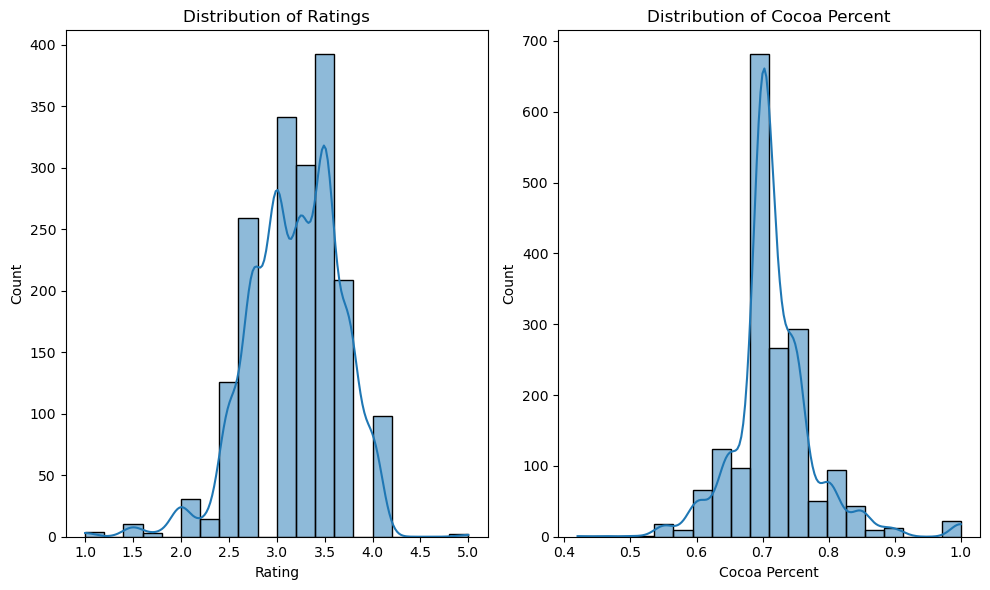

In [25]:
# Plotting the distribution of 'Rating'
plt.figure(figsize=(10, 6))

# Plot for Ratings
plt.subplot(1, 2, 1)
sns.histplot(df_cacao['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')

# Plot for Cocoa Percent
plt.subplot(1, 2, 2)
sns.histplot(df_cacao['Cocoa Percent'], bins=20, kde=True)
plt.title('Distribution of Cocoa Percent')

plt.tight_layout()
plt.show()


In [27]:
# Check for extreme values in Rating (above 5)
extreme_ratings = df_cacao[df_cacao['Rating'] > 5]
print("Extreme Rating Values:")
print(extreme_ratings)

# Check for extreme values in Cocoa Percent (e.g., above 100)
extreme_cocoa_percent = df_cacao[df_cacao['Cocoa Percent'] > 100]
print("Extreme Cocoa Percent Values:")
print(extreme_cocoa_percent)

Extreme Rating Values:
Empty DataFrame
Columns: [Index, Company, Bean Origin, Reference, Review Date, Cocoa Percent, Company Location, Latitude, Longitude, Company Loc_Latitude, Company Loc_Longitude, Rating, Bean Type, Broad Bean Origin, Region_Final, Cluster, Latitude2, Longitude3, Broad Bean_Latitude, Broad Bean_Longitude]
Index: []
Extreme Cocoa Percent Values:
Empty DataFrame
Columns: [Index, Company, Bean Origin, Reference, Review Date, Cocoa Percent, Company Location, Latitude, Longitude, Company Loc_Latitude, Company Loc_Longitude, Rating, Bean Type, Broad Bean Origin, Region_Final, Cluster, Latitude2, Longitude3, Broad Bean_Latitude, Broad Bean_Longitude]
Index: []


**No extreme Ratings / No extreme Cocoa Percentages found.** --> See also Script 6.3

### 3. Data prep for regression analysis 

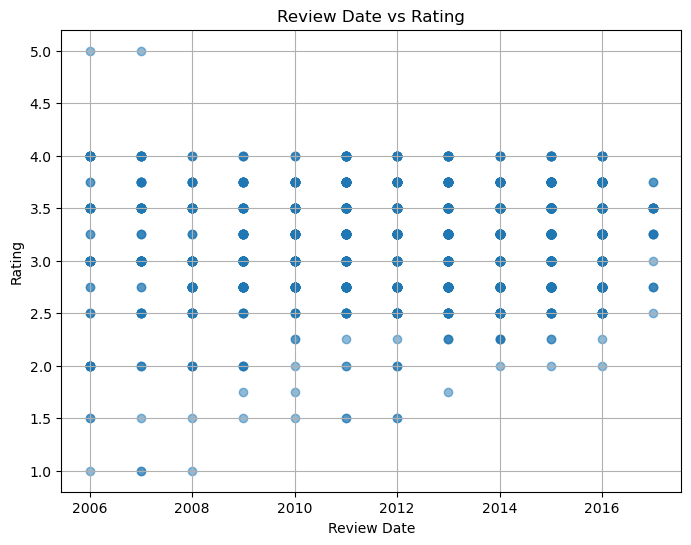

In [29]:
# Create a scatterplot for Rating vs Review Date
plt.figure(figsize=(8, 6))
plt.scatter(df_cacao['Review Date'], df_cacao['Rating'], alpha=0.5)
plt.title('Review Date vs Rating')
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


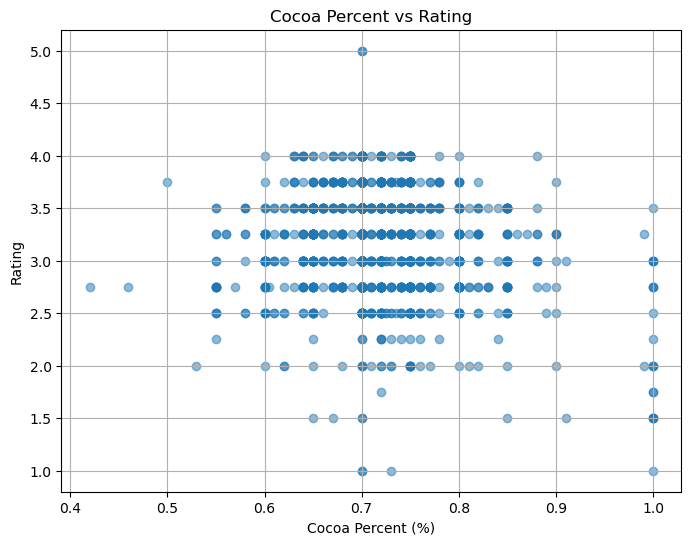

In [31]:
# Create a scatterplot for Cocoa Percent vs Rating
plt.figure(figsize=(8, 6))
plt.scatter(df_cacao['Cocoa Percent'], df_cacao['Rating'], alpha=0.5, marker='o')
plt.title('Cocoa Percent vs Rating')
plt.xlabel('Cocoa Percent (%)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


#### Hypothesis: Cocoa content does not significantly affect the rating of chocolate bars.

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df_cacao['Cocoa Percent'].values.reshape(-1, 1)  # Independent variable
y = df_cacao['Rating'].values.reshape(-1, 1)  # Dependent variable


In [35]:
X

array([[0.72],
       [0.7 ],
       [0.88],
       ...,
       [0.78],
       [0.8 ],
       [0.74]])

In [37]:
y

array([[3.25],
       [3.5 ],
       [2.75],
       ...,
       [3.5 ],
       [3.  ],
       [3.5 ]])

In [39]:
# Split data into a training set and a test set

# Split data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Print the shapes to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1253, 1), (538, 1), (1253, 1), (538, 1))

#### 4. Regression analysis

In [41]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict y values for the test set
y_pred = model.predict(X_test)


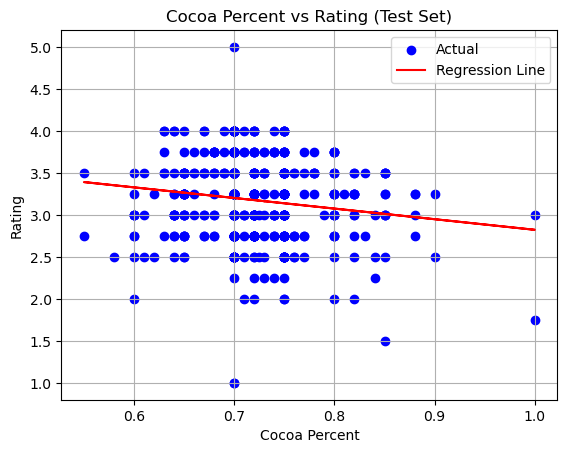

In [43]:
# Create plot that shows the regression line from the model on the test set

# Plot the actual data points from the test set
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the regression line using the predictions
plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.title('Cocoa Percent vs Rating (Test Set)')
plt.xlabel('Cocoa Percent')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()


The scatterplot and regression line show a weak negative trend between Cocoa Percent and Rating, suggesting a minimal decrease in rating as cocoa content increases. The widely scattered data points around the regression line indicate that the model does not fit the data well, with substantial variability not captured by the linear trend

In [45]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

mse, r2


(0.23159639675163987, 0.012049247640898653)

The performance metrics reinforce this conclusion:

Mean Squared Error (MSE): With an MSE of approximately 0.232, the model has a relatively high prediction error, indicating that its predictions are not close to the actual ratings.
𝑅
2
R 
2
  Score: The 
𝑅
2
R 
2
  score of around 0.012 implies that the model explains only about 1.2% of the variance in ratings, further confirming that cocoa content is not a strong predictor.
  
Summary: Both the visual analysis and performance metrics suggest that there is no significant linear relationship between Cocoa Percent and Rating. The regression model lacks predictive power and fails to capture the variability in ratings, supporting the null hypothesis that cocoa content does not significantly affect chocolate ratings. Other variables or factors are likely more important determinants of chocolate ratings.

In [52]:
# Create a DataFrame to compare actual and predicted y values
comparison_df_cacao = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

# Display the comparison DataFrame
comparison_df_cacao.head(11)


,Actual,Predicted
0,3.25,3.163749
1,3.50,3.012153
2,2.50,3.125850
3,3.50,3.201648
4,2.50,3.113217
5,2.75,3.138483
6,3.50,3.176382
7,2.75,3.201648
8,2.75,3.113217
9,2.50,3.138483


**Insights:**

**Model Fit**

The scatterplot and actual vs. predicted values comparison confirm that the model does not capture a meaningful trend between Cocoa Percent and Rating. The regression line provides a nearly flat prediction around a central value for most data points, reinforcing that the model fails to fit the data in a meaningful way. This supports the idea that cocoa content does not significantly impact chocolate ratings.

**Performance Metrics**

The 
𝑅
2
R 
2
  score was extremely low (close to zero), which indicates that the model explains almost none of the variance in the ratings. Additionally, the Mean Squared Error (MSE) of 0.2316 shows that there is some deviation between actual and predicted values, but the low 
𝑅
2
R 
2
  score is more revealing, demonstrating that the model's predictions barely improve upon simply guessing the average rating.

**Comparison of Actual and Predicted Values**

When examining the actual and predicted values in detail, it becomes apparent that the predicted ratings are clustered close to the mean rating (around 3.18) for almost all test values, regardless of the actual ratings. This behavior suggests that the model essentially predicts a "one-size-fits-all" rating near the mean, indicating an inability to capture any meaningful variation related to cocoa content.

**Potential Bias and Impacts**

Narrow Range of Ratings Prediction: The model’s predictions hover around a narrow band close to the mean rating, potentially indicating that cocoa content alone does not provide sufficient information to influence the ratings meaningfully. This might stem from the model's simplicity and the weak correlation between cocoa content and ratings.

Possible Influence of Additional Factors: The model only considers cocoa content as a predictor, but other variables, such as brand reputation, additional ingredients, and production quality, likely play a more substantial role in determining ratings. Without these variables, the model fails to capture these influences, leading to a biased, simplistic outcome.

Subjective Nature of Ratings: Given that chocolate ratings are subjective, based on individual preferences, the data could inherently exhibit high variability. Such subjective ratings make it challenging for a single attribute, like cocoa content, to explain differences across the board.

**Summary**
The combination of performance metrics, comparison of actual and predicted values, and subjective nature of the ratings strongly suggests that cocoa content alone is not a useful predictor of chocolate ratings. The model’s performance underscores that other factors likely have a far more significant influence, supporting the hypothesis that cocoa content does not significantly affect chocolate bar ratings.